<a href="https://colab.research.google.com/github/caioooooo3/Projeto-desempenho-dos-estudantes/blob/main/Mini_projeto_desempenho_escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [1]:
# Carregando os dados
data = 'https://github.com/caioooooo3/Projeto-desempenho-dos-estudantes'
df = data.copy()

AttributeError: 'str' object has no attribute 'copy'

In [ ]:
dados = df.fillna(0)  # Preencher valores ausentes com zero

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# Excluindo as variáveis não numéricas do DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação
corr = numeric_df.corr()

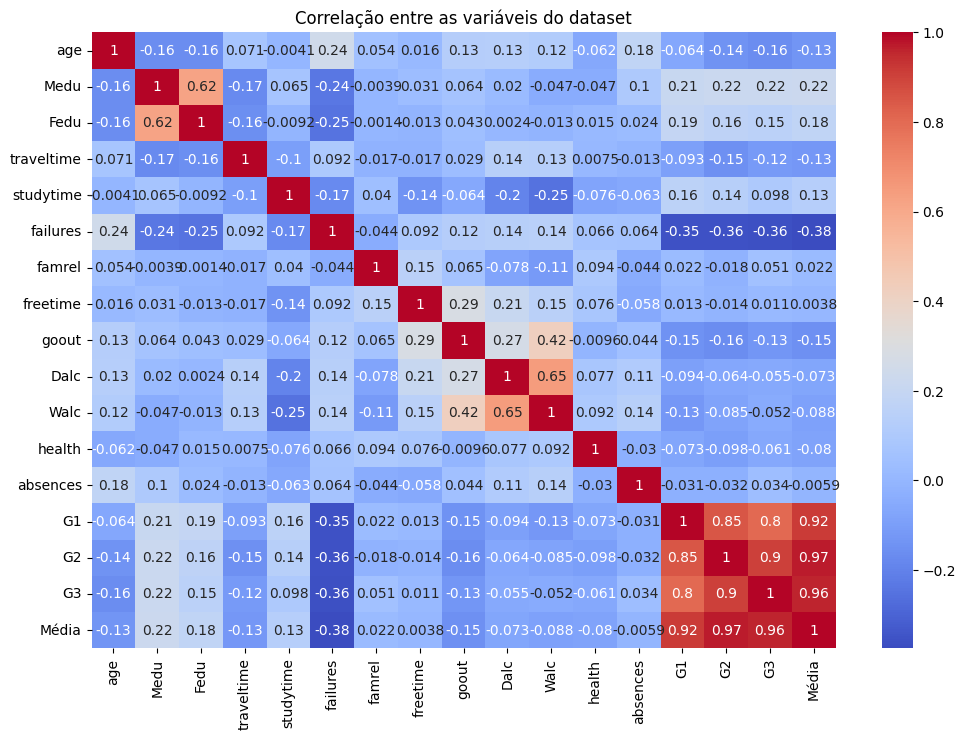

In [ ]:
#Gráfico de correlação

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre as variáveis do dataset')
plt.show()

In [ ]:
# Modelagem estatística
# Exemplo de regressão linear simples
X = df[['Medu', 'Fedu']]  # Variáveis independentes (educação dos pais)
y = df['G3']  # Variável dependente (nota final)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
predicoes = modelo.predict(X_test)
y_pred = modelo.predict(X_test)

In [ ]:
# Avaliar o modelo
mse = mean_squared_error(y_test, predicoes)
print("Erro quadrático médio:", mse)

Erro quadrático médio: 19.663866886524726


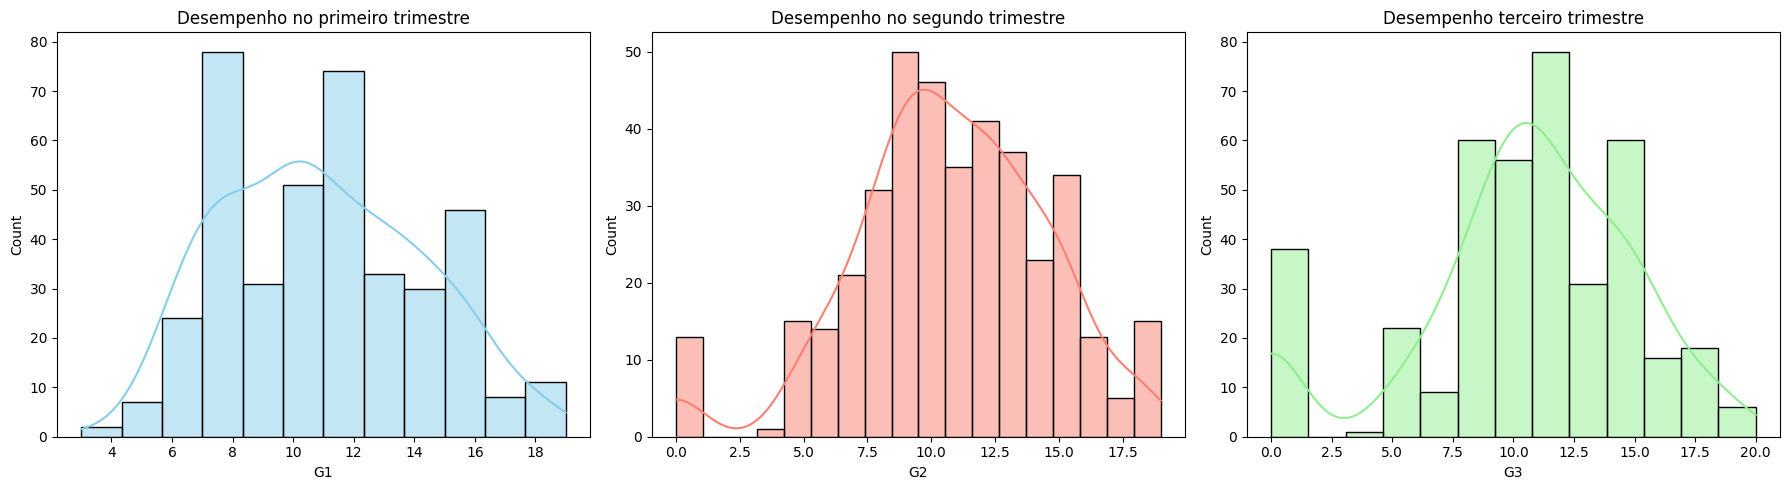

In [ ]:
# Visualizando a distribuição do desempenho acadêmico
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['G1'], kde=True, color='skyblue')
plt.title('Desempenho no primeiro trimestre')

plt.subplot(1, 3, 2)
sns.histplot(df['G2'], kde=True, color='salmon')
plt.title('Desempenho no segundo trimestre')

plt.subplot(1, 3, 3)
sns.histplot(df['G3'], kde=True, color='lightgreen')
plt.title('Desempenho terceiro trimestre')

plt.tight_layout()
plt.show()

In [ ]:
# Calcular a média das colunas G1, G2 e G3 para cada linha
df['Média'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# Exibir o DataFrame com a média calculada
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Média
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


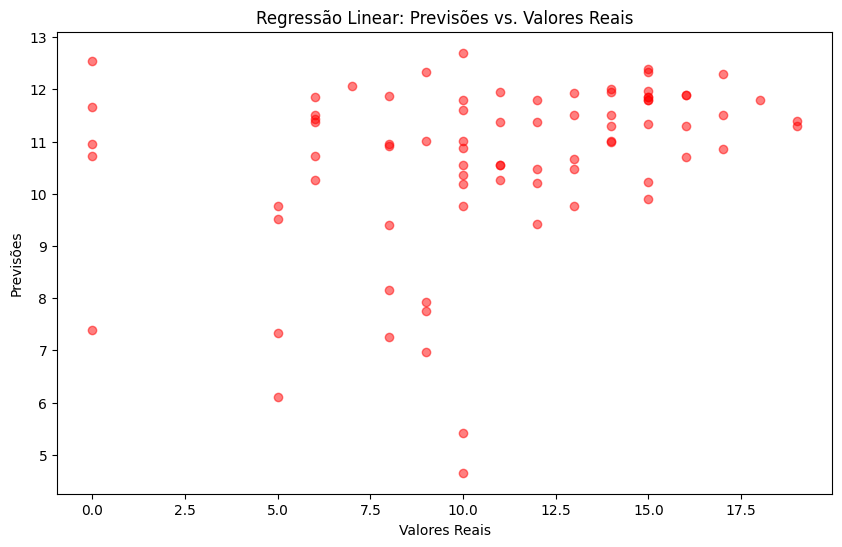

In [ ]:
# Visualizando a relação entre as variáveis e as previsões do modelo de regressão linear
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.title('Regressão Linear: Previsões vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

Random Forest Regressor:
Mean Squared Error (MSE): 15.56381144258162
R^2 Score: -0.051329640007560906


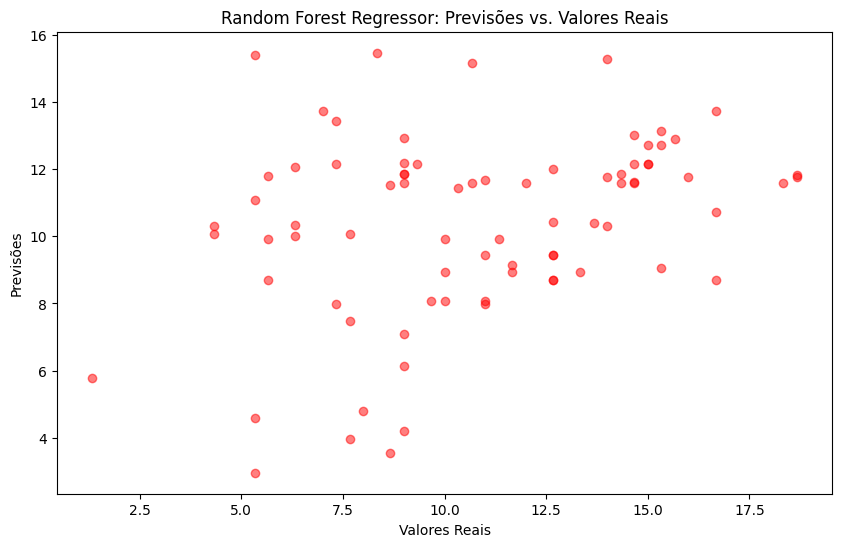

In [ ]:
# Treinando um modelo de Random Forest regressor
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Avaliando o modelo de Random Forest regressor
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print('Random Forest Regressor:')
print('Mean Squared Error (MSE):', mse_forest)
print('R^2 Score:', r2_forest)

# Visualizando a relação entre as variáveis e as previsões do modelo de Random Forest regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, color='red', alpha=0.5)
plt.title('Random Forest Regressor: Previsões vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

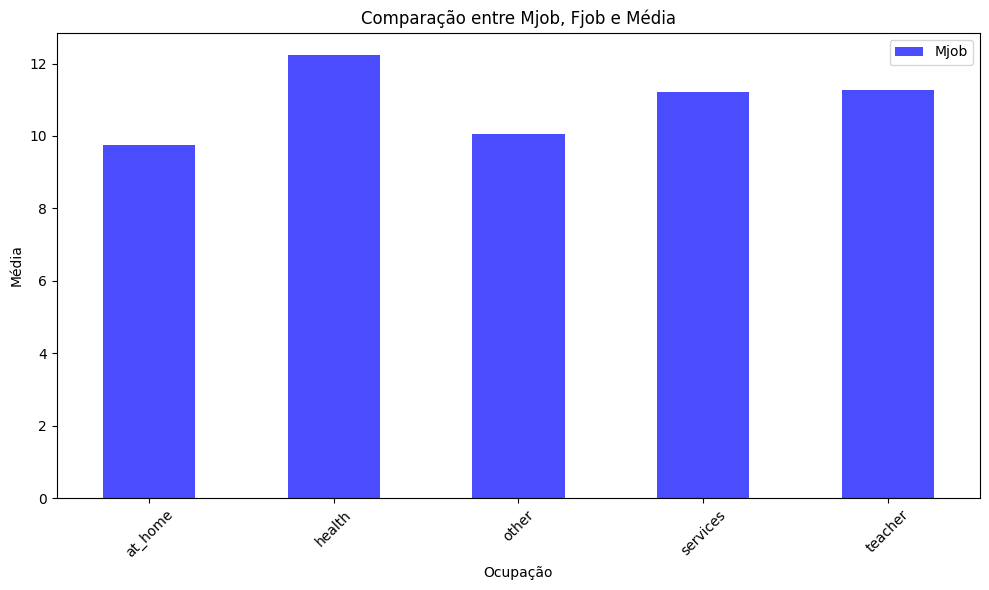

In [ ]:
# Gráfico de barras para comparar 'Mjob' com 'Média'
plt.figure(figsize=(10, 6))
df.groupby('Mjob')['Média'].mean().plot(kind='bar', color='blue', alpha=0.7, label='Mjob')
plt.title('Comparação entre Mjob, Fjob e Média')
plt.xlabel('Ocupação')
plt.ylabel('Média')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

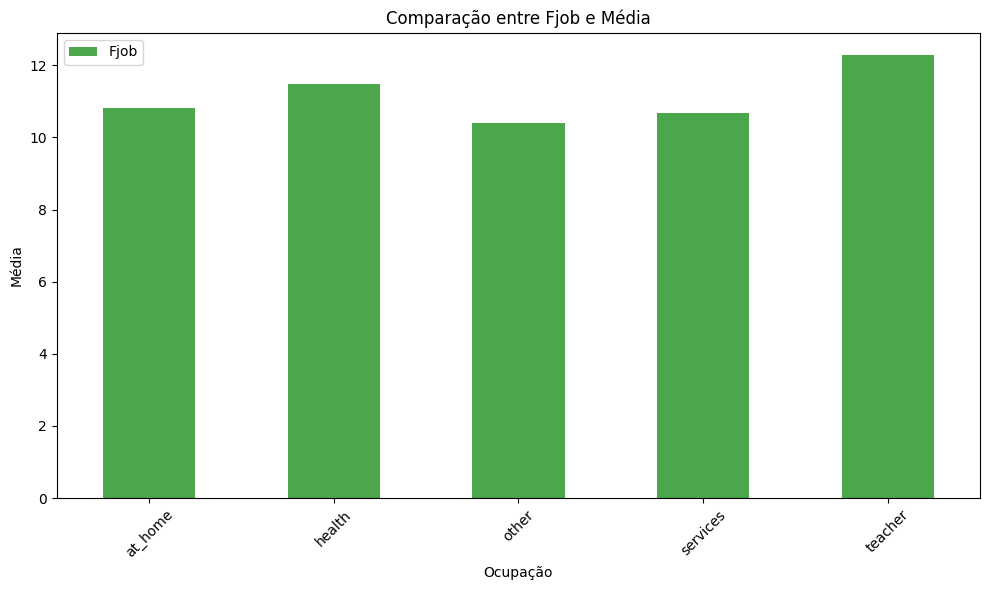

In [ ]:
# Gráfico de barras para comparar 'Mjob' e 'Fjob' com 'Média'
plt.figure(figsize=(10, 6))
df.groupby('Fjob')['Média'].mean().plot(kind='bar', color='green', alpha=0.7, label='Fjob')
plt.title('Comparação entre Fjob e Média')
plt.xlabel('Ocupação')
plt.ylabel('Média')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


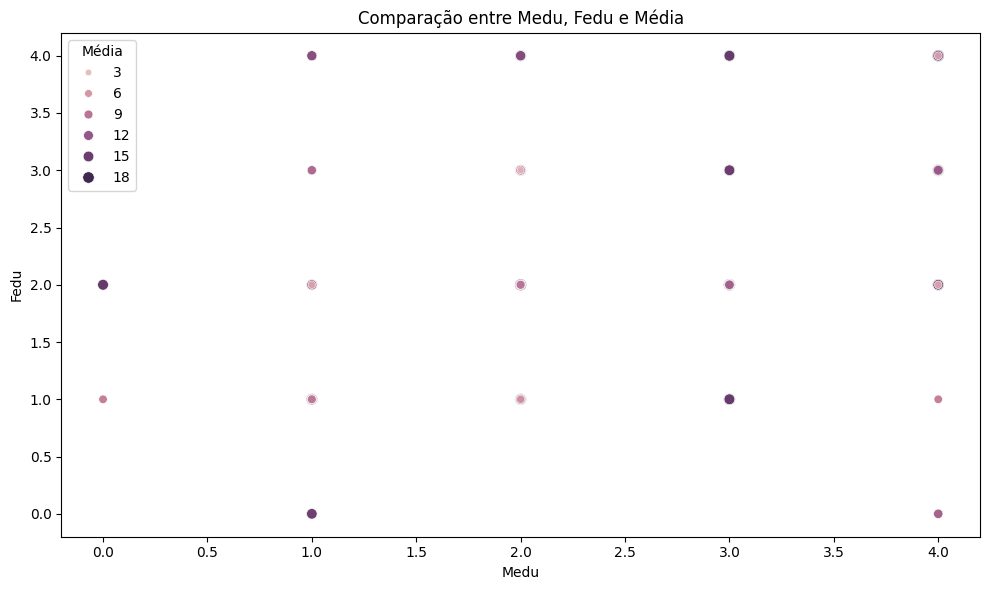

In [ ]:
# Gráfico de comparação entre 'Medu', 'Fedu' e 'Média'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Medu', y='Fedu', hue='Média', size='Média', data=df)
plt.title('Comparação entre Medu, Fedu e Média')
plt.xlabel('Medu')
plt.ylabel('Fedu')
plt.legend(title='Média')
plt.tight_layout()
plt.show()

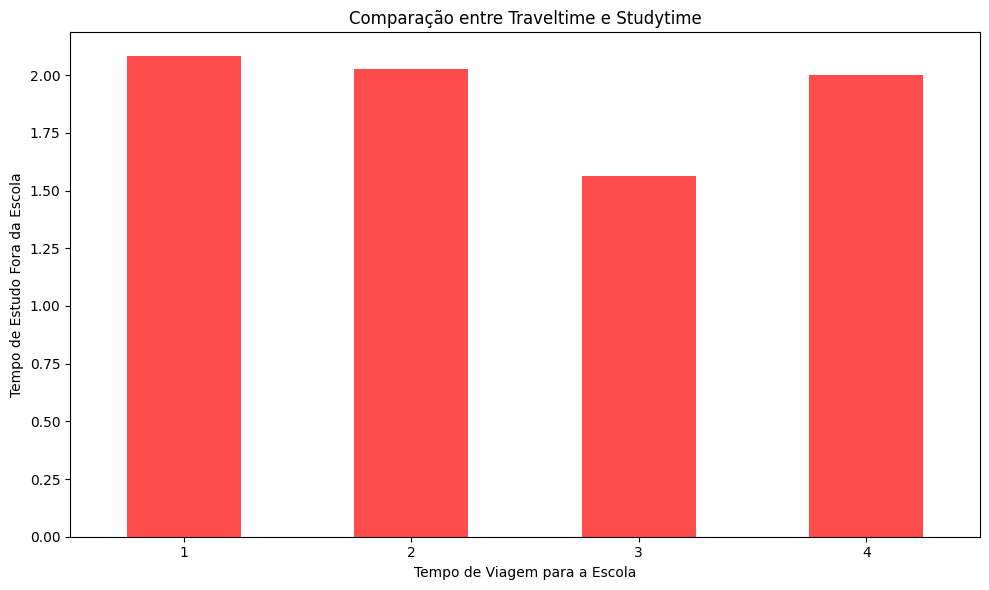

In [ ]:
# Gráfico de barras para comparar 'traveltime' com 'studytime'
plt.figure(figsize=(10, 6))
df.groupby('traveltime')['studytime'].mean().plot(kind='bar', color='red', alpha=0.7)
plt.title('Comparação entre Traveltime e Studytime')
plt.xlabel('Tempo de Viagem para a Escola')
plt.ylabel('Tempo de Estudo Fora da Escola')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

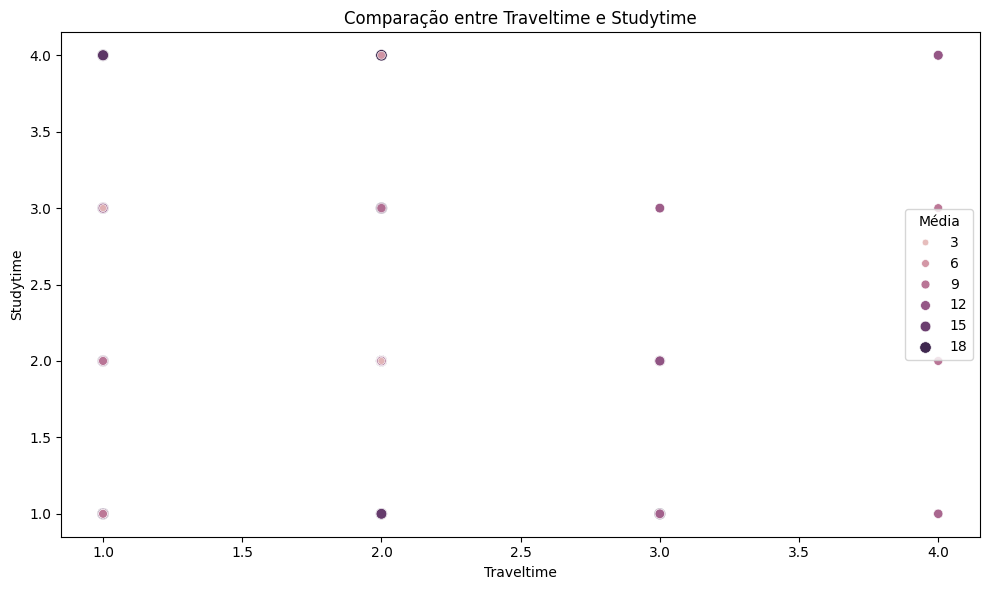

In [ ]:
# Gráfico de comparação entre 'traveltime' e 'studytime'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='traveltime', y='studytime', hue='Média', size='Média', data=df)
plt.title('Comparação entre Traveltime e Studytime')
plt.xlabel('Traveltime')
plt.ylabel('Studytime')
plt.legend(title='Média')
plt.tight_layout()
plt.show()

In [ ]:
#Basicamente, este código treina um modelo de regressão linear com base na educação da mãe e do pai dos alunos e depois avalia a capacidade desse modelo de prever a média das notas dos alunos com base nesses recursos.

In [ ]:
# Preparar os dados
X = df[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures']]
y = df['Média']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)
print('R^2 Score:', r2)

Mean Squared Error (MSE): 12.799259349839192
R^2 Score: 0.1354148195464251


In [ ]:
# Montar o modelo
def train_model(df):
    X = df[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures']]
    y = df['Média']
    model = LinearRegression()
    model.fit(X, y)
    return model

model = train_model(df)

In [ ]:
# Interface do Streamlit
st.title('Previsão da Média dos Alunos')

st.sidebar.header('Parâmetros do Modelo')

2024-04-04 00:03:22.876 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [ ]:

# Coletar parâmetros do usuário
Medu = st.sidebar.slider('Nível de educação da mãe (Medu)', 0, 4, 2)
Fedu = st.sidebar.slider('Nível de educação do pai (Fedu)', 0, 4, 2)
traveltime = st.sidebar.slider('Tempo de viagem para a escola (traveltime)', 1, 4, 2)
studytime = st.sidebar.slider('Tempo de estudo fora da escola (studytime)', 1, 4, 2)
failures = st.sidebar.slider('Número de falhas anteriores (failures)', 0, 3, 0)

# Fazer previsões com base nos parâmetros do usuário
pred_data = {'Medu': [Medu], 'Fedu': [Fedu], 'traveltime': [traveltime], 'studytime': [studytime], 'failures': [failures]}
pred_df = pd.DataFrame(data=pred_data)
prediction = model.predict(pred_df)

st.subheader('Previsão da Média do Aluno:')
st.write(prediction[0])

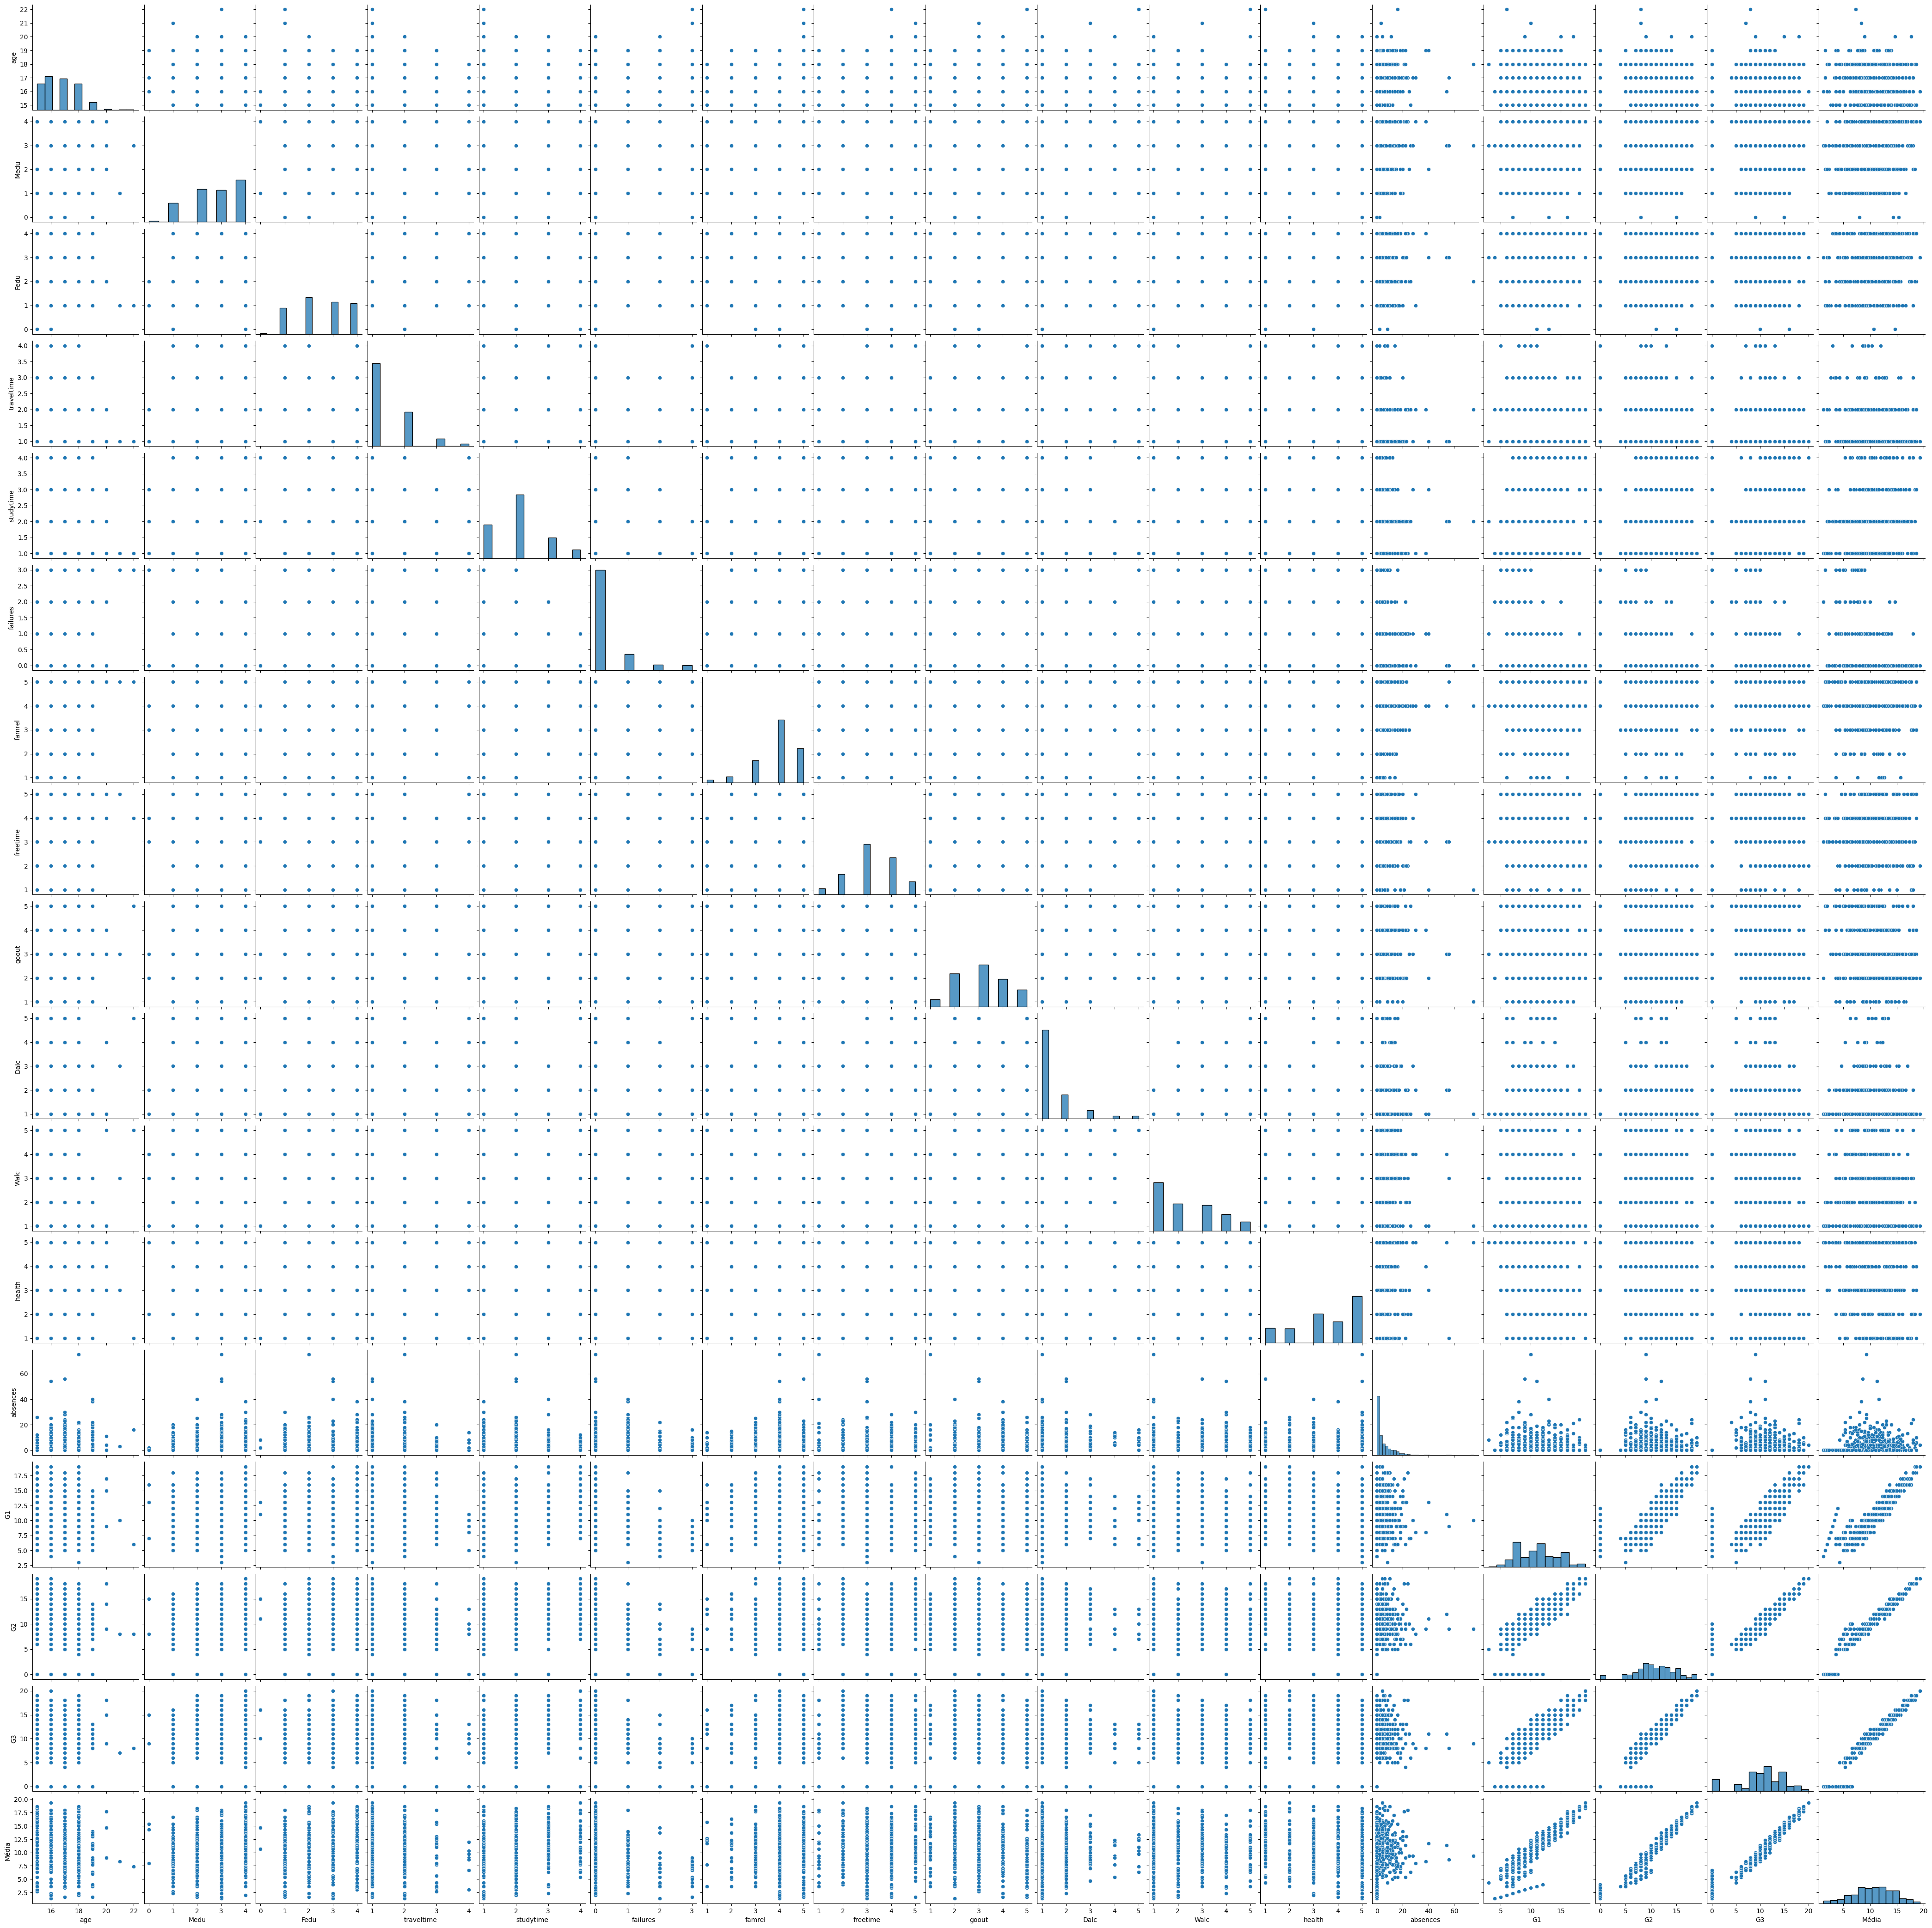

In [ ]:
#plot de pairwise de todas as variáveis do dataset

sns.pairplot(df)